In [ ]:
from google.colab import files
import pandas as pd
import io
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

uploaded = files.upload()

# Read the dataset into a Pandas DataFrame
df = pd.read_csv('Datathon1-Dataset2 - HAD7001.csv')

# Display the first few rows of the dataset to ensure it's loaded correctly
df.head()




Saving Datathon1-Dataset2 - HAD7001.csv to Datathon1-Dataset2 - HAD7001.csv


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685


In [ ]:
# Getting a brief understanding of the data, seeing if there are any implausible values and outliers
# Means and median are similar, low indication of skewness
print(df.describe())

                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.000000      0.000000      1.196086     10.0

In [ ]:
# Variables to check for outliers
variables_to_check = ['Physical_Activity', 'Screen_Time', 'BMI']

# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
    # Initialize a mask to keep track of rows that are NOT outliers
    mask = pd.Series(True, index=df.index)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Update the mask to exclude outliers in the current column
        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)
    # Return the filtered dataset
    return df[mask]

# Apply the function to clean the dataset
data_clean = remove_outliers_iqr(df, variables_to_check)

# Display the cleaned dataset
print("Cleaned Dataset:")
print(data_clean.head())

# Compare the number of rows removed
rows_removed = len(df) - len(data_clean)
print(f"Number of rows removed: {rows_removed}")
# 313 out 23525 rows removed = 1.32% of data were outliers, not that big of a deal

Cleaned Dataset:
   Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56  Female            3091            90                160   
1   69  Female            2090           106                 27   
2   46    Male            2938            11                 45   
3   32  Female            3022            48                112   
4   60  Female            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  
0                    4            1  1.569070  81.199394  32.981343  
1                    0            9  1.629449  74.273566  27.973877  
2                    2            3  1.637726  71.453466  26.640417  
3                    1            8  1.514198  98.163045  42.813720  
4                    0            7  1.410559  57.323914  28.810685  
Number of rows removed: 313


In [ ]:
# Summary statistics for the original dataset
print("Summary statistics for original data (df):")
print(df.describe())
# Summary statistics for the cleaned dataset
print("Summary statistics for cleaned data (data_clean):")
print(data_clean.describe())

Summary statistics for original data (df):
                Age  Calorie_Intake  Sugar_Intake  Physical_Activity  \
count  23535.000000    23535.000000  23535.000000       23535.000000   
mean      48.532993     2495.845634     64.824559          89.496707   
std       17.872736      577.798752     32.004657          52.120810   
min       18.000000     1500.000000     10.000000           0.000000   
25%       33.000000     1991.000000     37.000000          45.000000   
50%       48.000000     2495.000000     65.000000          90.000000   
75%       64.000000     2994.000000     93.000000         135.000000   
max       79.000000     3499.000000    119.000000         179.000000   

       Fast_Food_Frequency   Screen_Time        Height        Weight  \
count         23535.000000  23535.000000  23535.000000  23535.000000   
mean              2.018441      5.486127      1.650279     70.019142   
std               1.414634      3.454036      0.119714     15.016866   
min               0.

In [ ]:
# Check for missing values in each column
print(data_clean.isna().sum())
# No missing values

Age                    0
Gender                 0
Calorie_Intake         0
Sugar_Intake           0
Physical_Activity      0
Fast_Food_Frequency    0
Screen_Time            0
Height                 0
Weight                 0
BMI                    0
dtype: int64


In [ ]:
# Ensure `data_clean` is a copy of the original DataFrame to avoid issues with slicing
data_clean = data_clean.copy()

# Recode the 'Gender' variable into 0 = Male, and 1 = Female
data_clean.loc[:, 'Gender'] = data_clean['Gender'].map({'Male': 0, 'Female': 1})

# Convert Physical Activity from minutes to hours and create a new column
data_clean.loc[:, 'Physical_Activity_hours'] = data_clean['Physical_Activity'] / 60

# Display the first few rows to check the changes
print(data_clean.head())

   Age Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0   56      1            3091            90                160   
1   69      1            2090           106                 27   
2   46      0            2938            11                 45   
3   32      1            3022            48                112   
4   60      1            2350            83                115   

   Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                    4            1  1.569070  81.199394  32.981343   
1                    0            9  1.629449  74.273566  27.973877   
2                    2            3  1.637726  71.453466  26.640417   
3                    1            8  1.514198  98.163045  42.813720   
4                    0            7  1.410559  57.323914  28.810685   

   Physical_Activity_hours  
0                 2.666667  
1                 0.450000  
2                 0.750000  
3                 1.866667  
4                 1.916667  


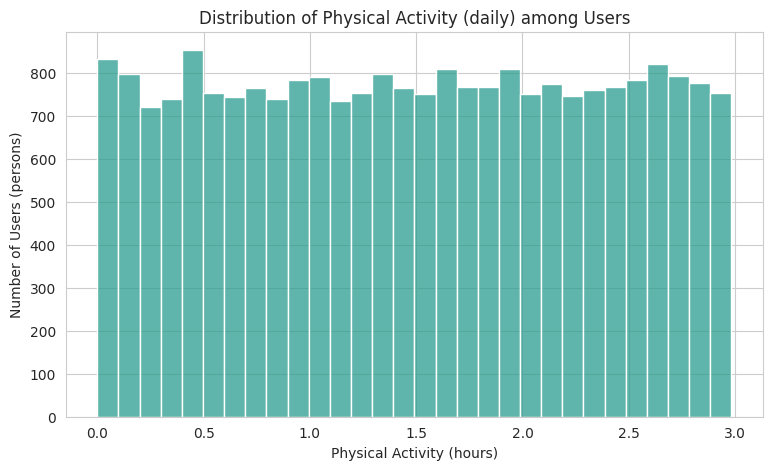

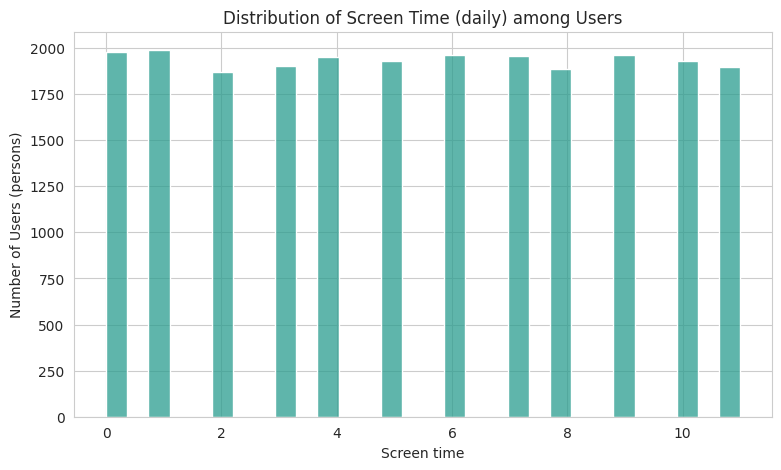

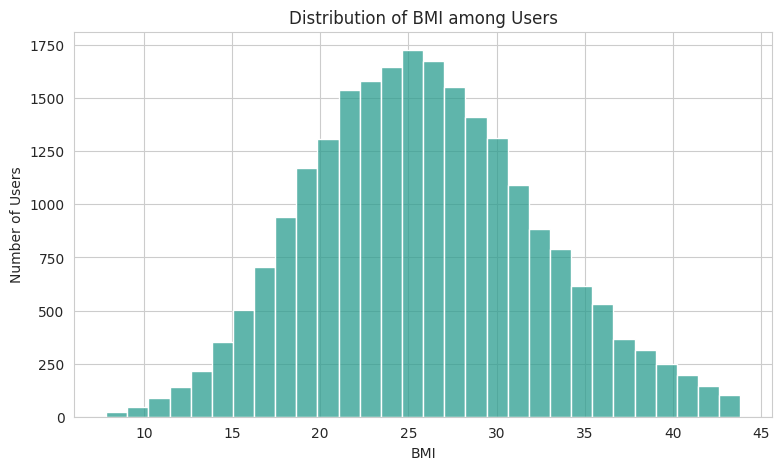

In [ ]:
# Create some histograms to visually understand the distribution of the key variables that will be used in the model
# Import necessary libraries
import seaborn as sns

# Set the style for seaborn
sns.set_style('whitegrid')

# Create a histogram for the 'Physical_Activity_hours' feature
plt.figure(figsize=(9, 5))
sns.histplot(data_clean['Physical_Activity_hours'], bins=30, kde=False, color='#2a9d8f')
plt.title('Distribution of Physical Activity (daily) among Users')
plt.xlabel('Physical Activity (hours)')
plt.ylabel('Number of Users (persons)')
plt.show()

# Create a histogram for the 'Screen_Time' feature
plt.figure(figsize=(9, 5))
sns.histplot(data_clean['Screen_Time'], bins=30, kde=False, color='#2a9d8f')
plt.title('Distribution of Screen Time (daily) among Users')
plt.xlabel('Screen time')
plt.ylabel('Number of Users (persons)')
plt.show()

# Create a histogram for the 'BMI' feature
plt.figure(figsize=(9, 5))
sns.histplot(data_clean['BMI'], bins=30, kde=False, color='#2a9d8f')
plt.title('Distribution of BMI among Users')
plt.xlabel('BMI')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
# Grouping it by Sex to see if there are any distribution differences in screen time
# Using groupby to calculate the average age by gender
avg_age_by_sex = data_clean.groupby('Gender')['Screen_Time'].mean().reset_index()
print(avg_age_by_sex)

# Also checking for physical activity
avg_age_by_sex = data_clean.groupby('Gender')['Physical_Activity_hours'].mean().reset_index()
print(avg_age_by_sex)

# Also checking for BMI
avg_age_by_sex = data_clean.groupby('Gender')['BMI'].mean().reset_index()
print(avg_age_by_sex)

# Everything seems to be similar, no differences across gender

   Gender  Screen_Time
0       0     5.531825
1       1     5.453475
   Gender  Physical_Activity_hours
0       0                 1.497177
1       1                 1.489463
   Gender        BMI
0       0  25.870804
1       1  25.890024


In [ ]:
# Grouping it by Age to see if there are any distribution differences in screen time
# Using groupby to calculate the average physical activity by age
avg_age = data_clean.groupby('Age')['Physical_Activity_hours'].mean().reset_index()
print(avg_age)

# Also checking for BMI
avg_age_BMI = data_clean.groupby('Age')['BMI'].mean().reset_index()
print(avg_age_BMI)

# not a lot of differences across the spectrum of age

    Age  Physical_Activity_hours
0    18                 1.409897
1    19                 1.406516
2    20                 1.489234
3    21                 1.460522
4    22                 1.508500
..  ...                      ...
57   75                 1.504702
58   76                 1.507050
59   77                 1.491346
60   78                 1.478546
61   79                 1.464354

[62 rows x 2 columns]
    Age        BMI
0    18  25.997507
1    19  25.628036
2    20  26.049806
3    21  26.294108
4    22  26.183381
..  ...        ...
57   75  25.932403
58   76  25.576349
59   77  26.611048
60   78  25.680503
61   79  25.627646

[62 rows x 2 columns]


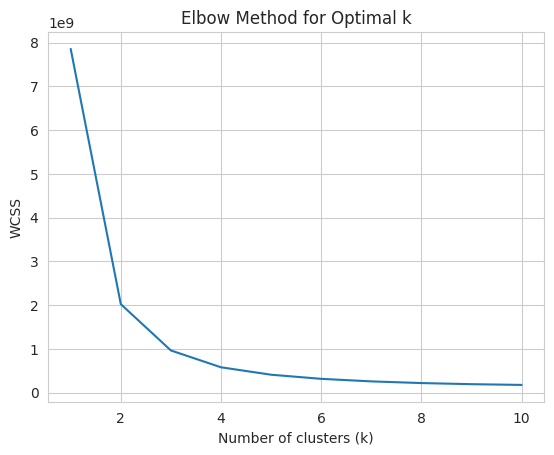

In [ ]:
# We wanted to identify key risk BMI groups based on physical activity and screen time,
# we did not want to make any assumptions and wanted the model to tease out any relationships
# Additionally given our objective we did not want to group individuals based on the existing BMI classifications
# And so we decided to go with KMeans that segments individuals into categories without labels
# Compared to KNN which classifies the individuals into existing labels

# Finding optimal number of clusters via Elbow method
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11): # Here we are iterating over a range of k values (1 to 10)
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_clean)
    wcss.append(kmeans.inertia_)

# Plot WCSS against k
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Optimal clustering looks to be around 2-3, let's do 3 to be conservative and not underfit, but also not overfit by going to 4 clusters

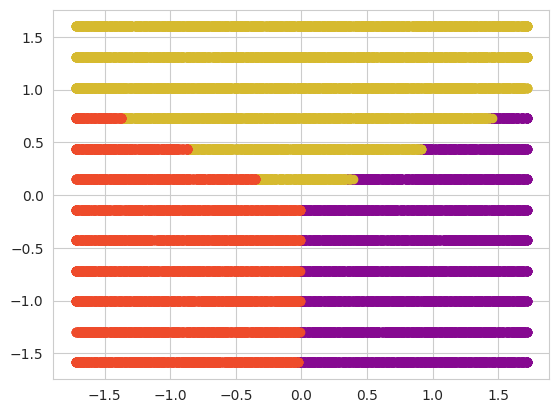

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Function to visualize the clustering results
def plot_clusters(x, labels, k):
    # Define colors for each cluster
    colors = ['#860991', '#d6ba2f', '#EE4B2B']
    # Loop through each cluster
    for i in range(k):
        # Filter the data points that belong to the current cluster
        filtered_label0 = x[labels == i]
        # Plot the filtered data points using the corresponding color
        plt.scatter(filtered_label0[:, 0], filtered_label0[:, 1], c=colors[i])
    # Display the plot
    plt.show()

  # Choose two features, 'Physical_Activity_hours', 'Screen_Time', and BMI for clustering and visualization
features = ['Physical_Activity_hours', 'Screen_Time', "BMI"]

# Convert the selected features from DataFrame to a NumPy array for easier processing with sklearn
data =  data_clean[features].to_numpy()

# Standardize (Normalize) the data - this makes the mean 0 and standard deviation 1 for each feature
# Standardization can help the k-means algorithm perform better as it's sensitive to feature scales
st_x = StandardScaler()
data = st_x.fit_transform(data)

# Apply k-means clustering on the standardized data
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(data)

# Visualize the clustering results using the defined function
plot_clusters(data, label, 3)


In [ ]:
# Create 3 new dataframes for each cluster
df_cluster_1 = data_clean[label == 0].reset_index(drop=True)
df_cluster_2 = data_clean[label == 1].reset_index(drop=True)
df_cluster_3 = data_clean[label == 2].reset_index(drop=True)

# Print the new DataFrames to see if it actually worked
print("Cluster 1 data:")
print(df_cluster_1)

print("Cluster 2 data:")
print(df_cluster_2)

print("Cluster 3 data:")
print(df_cluster_3)

Cluster 1 data:
      Age Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0      56      1            3091            90                160   
1      78      0            3156            21                119   
2      41      0            3077           102                144   
3      53      0            2757            69                134   
4      20      1            3066            40                175   
...   ...    ...             ...           ...                ...   
7346   21      1            1638            31                158   
7347   60      0            2700            61                150   
7348   79      0            3021            42                148   
7349   45      1            1660            56                173   
7350   62      1            2466            62                166   

      Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                       4            1  1.569070  81.199394  32.981343   
1      

In [ ]:
# Get mean, SD of each of the clusters
print(df_cluster_1[['Physical_Activity_hours', 'Screen_Time', 'BMI']].describe())
print(df_cluster_2[['Physical_Activity_hours', 'Screen_Time', 'BMI']].describe())
print(df_cluster_3[['Physical_Activity_hours', 'Screen_Time', 'BMI']].describe())

       Physical_Activity_hours  Screen_Time          BMI
count              7351.000000  7351.000000  7351.000000
mean                  2.291171     3.266222    25.935599
std                   0.434834     2.233755     6.447771
min                   1.466667     0.000000     7.873370
25%                   1.916667     1.000000    21.343225
50%                   2.316667     3.000000    25.614578
75%                   2.683333     5.000000    30.219338
max                   2.983333     8.000000    43.788030
       Physical_Activity_hours  Screen_Time          BMI
count              8690.000000  8690.000000  8690.000000
mean                  1.495809     9.126352    25.838146
std                   0.778973     1.446131     6.435693
min                   0.000000     6.000000     7.856881
25%                   0.883333     8.000000    21.282049
50%                   1.500000     9.000000    25.584266
75%                   2.116667    10.000000    30.017021
max                   2.983333 